In [2]:
import numpy as np 
import pandas as pd 
import os
#print(os.listdir("Dataset"))
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.models import Model
from keras.optimizers import Adam
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [ ]:
embeddings_index = {}
f = open('glove6b50dtxt/glove.6B.50d.txt')
for line in f:
    values = line.split(' ')
    word = values[0] ## The first entry is the word
    coefs = np.asarray(values[1:], dtype='float32') ## These are the vecotrs representing the embedding for the word
    embeddings_index[word] = coefs
f.close()

print('GloVe data loaded')

In [ ]:
#import re

## Iterate over the data to preprocess by removing stopwords
#lines_without_stopwords=[] 
#for line in x: 
    #line = line.lower()
    #line_by_words = re.findall(r'(?:\w+)', line, flags = re.UNICODE) # remove punctuation ans split
    #new_line=[]
    #for word in line_by_words:
        #if word not in stop:
            #new_line.append(word)
    #lines_without_stopwords.append(new_line)
#texts = lines_without_stopwords

#print(texts[0:5])

In [12]:
# Code adapted from (https://github.com/keras-team/keras/blob/master/examples/pretrained_word_embeddings.py)
# Vectorize the text samples

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

MAX_NUM_WORDS = 20000
MAX_SEQUENCE_LENGTH = 64
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)



Found 26164 unique tokens.


In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le=LabelEncoder()

In [15]:
y=le.fit_transform(df["label"])

In [16]:
y

array([2, 3, 1, ..., 5, 1, 0])

In [17]:
labels = to_categorical(np.asarray(y))
print(data.shape)
print(labels.shape)

(11322, 80)
(11322, 6)


In [18]:
## More code adapted from the keras reference (https://github.com/keras-team/keras/blob/master/examples/pretrained_word_embeddings.py)
# prepare embedding matrix 
from keras.layers import Embedding
from keras.initializers import Constant

## EMBEDDING_DIM =  ## seems to need to match the embeddings_index dimension
EMBEDDING_DIM = embeddings_index.get('a').shape[0]
num_words = min(MAX_NUM_WORDS, len(word_index)) + 1
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i > MAX_NUM_WORDS:
        continue
    embedding_vector = embeddings_index.get(word) ## This references the loaded embeddings dictionary
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

(2501, 50)


Text(0.5, 1.0, 'example vectors')

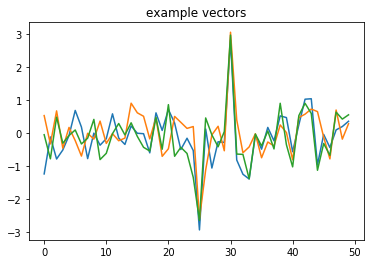

In [19]:
## Peeking at the embedding matrix values
print(embedding_matrix.shape)
plt.plot(embedding_matrix[16])
plt.plot(embedding_matrix[37])
plt.plot(embedding_matrix[18])
plt.title('example vectors')

In [20]:
## Code from: https://medium.com/@sabber/classifying-yelp-review-comments-using-cnn-lstm-and-pre-trained-glove-word-embeddings-part-3-53fcea9a17fa
## To create and visualize a model

from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation

model = Sequential()
model.add(Embedding(num_words, 50, input_length=80, weights= [embedding_matrix], trainable=False))

model.add(Conv1D(128, 8 ,activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.3))

model.add(Conv1D(64, 4, activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(32, 2, activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(16, activation = 'relu' ))
model.add(Dense(8,activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.summary()

In [21]:

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
epochs = 20
batch_size = 15

history2 = model.fit(data, labels, epochs=epochs, batch_size=batch_size,validation_split = 0.2)


Train on 9057 samples, validate on 2265 samples
Epoch 1/20
9057/9057 [==============================] - 8s 894us/step - loss: 1.1556 - accuracy: 0.8229 - val_loss: 0.8625 - val_accuracy: 0.8333
Epoch 2/20
9057/9057 [==============================] - 8s 833us/step - loss: 0.6234 - accuracy: 0.8331 - val_loss: 0.4489 - val_accuracy: 0.8333
Epoch 3/20
9057/9057 [==============================] - 7s 775us/step - loss: 0.4466 - accuracy: 0.8333 - val_loss: 0.4454 - val_accuracy: 0.8333
Epoch 4/20
9057/9057 [==============================] - 7s 820us/step - loss: 0.4449 - accuracy: 0.8333 - val_loss: 0.4447 - val_accuracy: 0.8333
Epoch 5/20
9057/9057 [==============================] - 8s 869us/step - loss: 0.4438 - accuracy: 0.8333 - val_loss: 0.4447 - val_accuracy: 0.8333
Epoch 6/20
9057/9057 [==============================] - 7s 760us/step - loss: 0.4437 - accuracy: 0.8333 - val_loss: 0.4445 - val_accuracy: 0.8333
Epoch 7/20
9057/9057 [==============================] - 6s 705us/step - loss

In [ ]:
np.unique(y)

In [3]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-4
EPOCHS =10
BS = 32

In [39]:
model = Sequential()
model.add(Embedding(num_words, 50, input_length=80, weights= [embedding_matrix], trainable=False))


ValueError: Unexpectedly found an instance of type `<class 'keras.layers.embeddings.Embedding'>`. Expected a symbolic tensor instance.

In [26]:
for layer in baseModel.layers:
	layer.trainable = False

# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] compiling model...


In [27]:
model.fit(data, np.array(labels), validation_split=0.2, epochs = 10)


ValueError: Error when checking input: expected input_1 to have 4 dimensions, but got array with shape (11322, 80)

In [33]:
data[0].shape

(80,)